1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

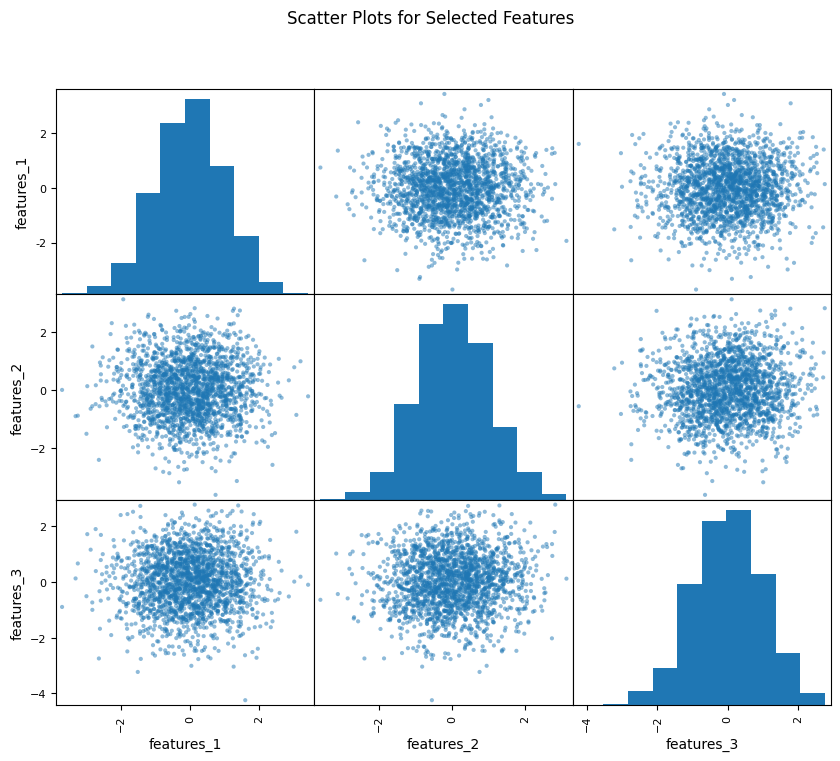

            features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000
Most correlation coefficients are close to zero. This indicates that there is no strong linear dependence between pairs of features


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import scipy
from scipy.integrate import trapz

data = pd.read_csv('regression_generated.csv')

features = ['features_1', 'features_2', 'features_3']

pd.plotting.scatter_matrix(data[features], figsize=(10, 8))
plt.suptitle('Scatter Plots for Selected Features')
plt.show()

correlation_matrix = data[features].corr()
print(correlation_matrix)
print("Most correlation coefficients are close to zero. This indicates that there is no strong linear dependence between pairs of features")

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

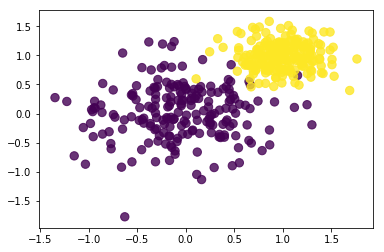

In [1]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

Color-coded scatter plot


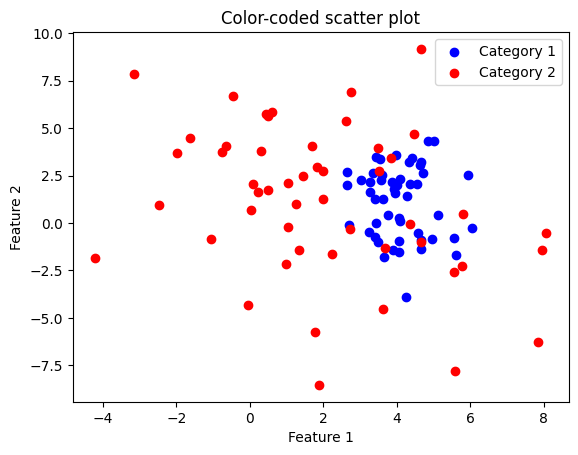

In [2]:
samples = 50
mean1 = (4, 1)
std1 = (1, 2)
mean2 = (2, 1)
std2 = (3, 4) 

def generate_dataset(samples, mean1, std1, mean2, std2):
    category1 = np.random.normal(mean1, std1, size=(samples, 2)) 
    category2 = np.random.normal(mean2, std2, size=(samples, 2))
    return category1, category2

def plot_color(category1, category2):
    plt.scatter(category1[:, 0], category1[:, 1], color='blue', label='Category 1')
    plt.scatter(category2[:, 0], category2[:, 1], color='red', label='Category 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Color-coded scatter plot')
    plt.legend()
    plt.show()
    
print("Color-coded scatter plot")
category1, category2 = generate_dataset(samples, mean1, std1, mean2, std2)
plot_color(category1, category2)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


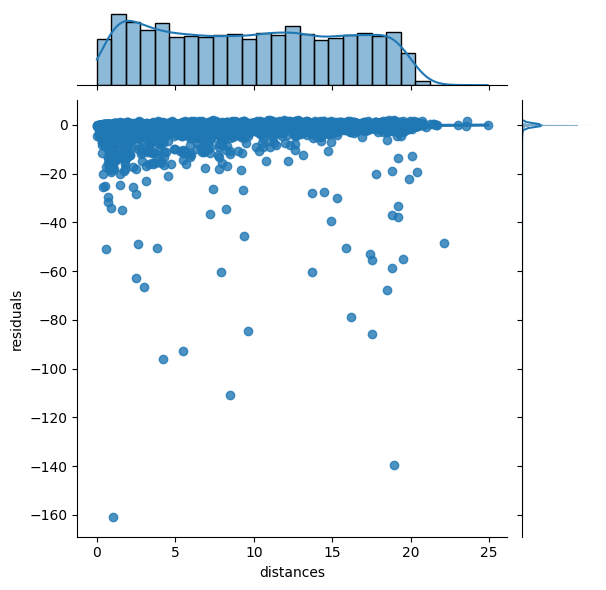

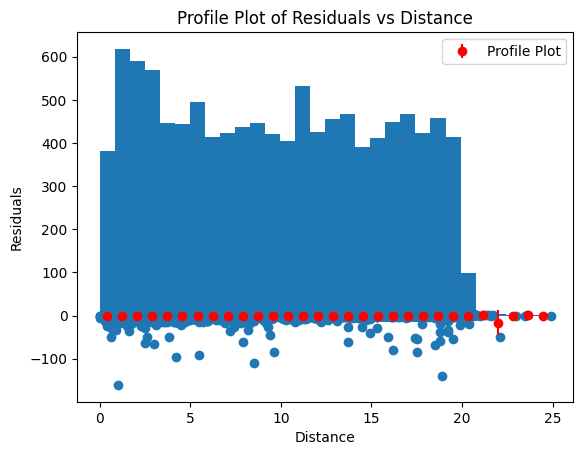

In [5]:
file_path = 'residuals_261.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)

print(data)
data = pd.DataFrame.from_dict(data.item())
df = data[data['residuals'] < 2].copy()
sns.jointplot(data=df, x='distances', y='residuals', kind="reg")
plt.show()

h, xedges, patches = plt.hist(df['distances'], bins=30)
x = (xedges[:-1] + xedges[1:]) / 2
df.loc[:, 'bins'] = pd.cut(df['distances'], bins=xedges, labels=False)
y = df.groupby('bins')['residuals'].mean().values
err_y = df.groupby('bins')['residuals'].std().values

plt.scatter(df['distances'], df['residuals'])
plt.errorbar(x, y, yerr=err_y, fmt='o', c='red', label='Profile Plot')
plt.xlabel('Distance')
plt.ylabel('Residuals')
plt.legend()
plt.title('Profile Plot of Residuals vs Distance')
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


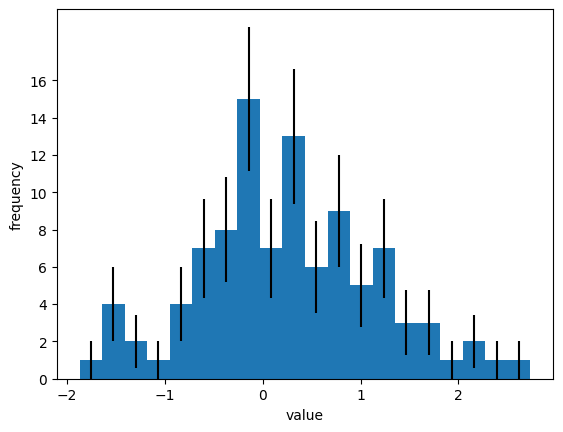

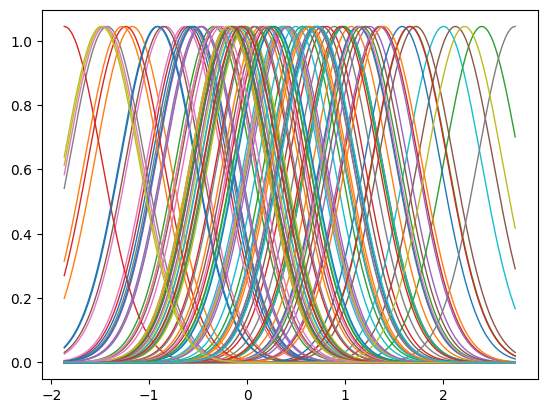

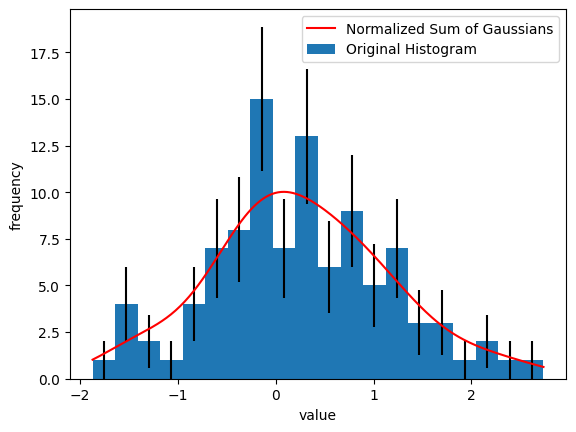

In [6]:
x = np.random.normal(0, 1, 100) 
hist, bin_edges = np.histogram(x, bins=20)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
poisson_errors = np.sqrt(hist)
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], yerr=poisson_errors)
plt.xlabel('value')
plt.ylabel('frequency')
plt.yticks(np.arange(0, max(hist) + 2, 2))
plt.show()


standart_deviation = 1.06 * x.std() * 100**(-1/5)
grid  = np.linspace(min(x), max(x), 300)
kernels = []
for elem in x:
    kernel = scipy.stats.norm(elem, standart_deviation).pdf(grid)
    kernels.append(kernel)
    plt.plot(grid, kernel, lw=1)
plt.show()

sum_of_gaussians = np.sum(kernels, axis=0)
integral_hist = trapz(hist, bin_centers)
integral_gaussians = trapz(sum_of_gaussians, grid)
normalized_sum = sum_of_gaussians * integral_hist / integral_gaussians

plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], yerr=poisson_errors, label='Original Histogram')
plt.plot(grid, normalized_sum, 'r', label='Normalized Sum of Gaussians')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.show()